# Manual decision tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt

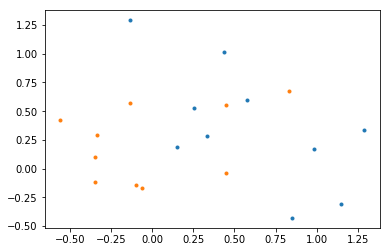

In [2]:
# Generate data
n = 20
sigma = 0.5

np.random.seed(1)
mu = np.random.uniform(size=(2,2))
x = np.empty
y = np.empty
for i in range(mu.shape[0]):
    n1 = round(n/2)
    xn = mu[i,:]+np.random.normal(size=(n1,2))*sigma
    if i==0:
        x = xn
        y = np.ones(shape=(n1,1))*i
    else:
        x = np.append(x, xn, axis=0)
        y = np.append(y, np.ones(shape=(n1,1))*i)

def mydraw(x,y):
    for i in np.unique(y):
        g = (y==i)
        plt.plot(x[g,0],x[g,1],'.');
        
        
ax = plt.axes
mydraw(x,y)

In [3]:
# Gini impurity
def gini(a):
    #quadratify = lambda z: 1-z**2 - (1-z)**2
    quadratify = lambda z: z - z**2
    zl = np.cumsum(1-a)/(1+np.arange(len(a)))
    zl = quadratify(zl) # Impurity of the left half
    zr = np.cumsum(a)
    zr = (zr[-1]-zr)/np.arange(len(a),0,-1)
    zr = quadratify(zr)
    g = (zl*np.arange(1,1+len(a)) + zr*np.arange(len(a),0,-1))/len(a) # Weighted impurity
    i = np.argmin(g)
    return  (i, g[i])

a = [1,0,0,0,1,1,1,0,0,0]
a = np.array(a)
print(gini(a))

(6, 0.17142857142857143)


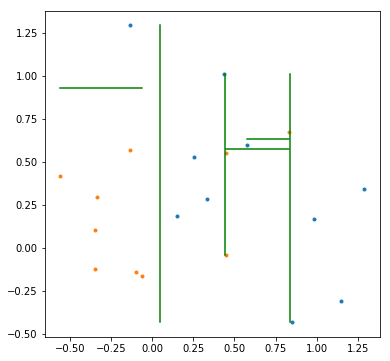

In [4]:
def split(x,y,dim=0):
    i = np.argsort(x[:,dim])
    n = y.shape[0]
    (im,e) = gini(y[i]) # Point of split and impurity value
    if im<n-1: im += 1  # Make the left section include the breeak point
    m = np.mean(x[i[[im-1,im]],:],axis=0) # Decision value for this split
    if dim==0:
        l = (m[0]*np.array([1,1]) , np.array([np.min(x[:,1]),np.max(x[:,1])])) # To plot a line later
    else:
        l = (np.array([np.min(x[:,0]),np.max(x[:,0])]) , m[1]*np.array([1,1]))
    return (i[0:im],i[im:],e,l)

def divide(x,y):
    if len(np.unique(y))<=1: # If uniform, you're done, eject
        return
    (a0,b0,e0,l0) = split(x,y,0)
    (a1,b1,e1,l1) = split(x,y,1)
    if e0<e1: # Split 0 is better
        plt.plot(l0[0],l0[1],'g-')
        divide(x[a0],y[a0]) # Recurrent part
        divide(x[b0],y[b0])
    else:
        plt.plot(l1[0],l1[1],'g-')
        divide(x[a1],y[a1])
        divide(x[b1],y[b1])

# fig
plt.figure(figsize=(6,6))
ax = plt.axes
mydraw(x,y)
divide(x,y)